# Star Wars survey

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
print(len(star_wars["RespondentID"]))

1187


In [2]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]
print(len(star_wars["RespondentID"]))

1186


## Data cleaning 

In [3]:
seen_6_films = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()
is_fan = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts()

print(seen_6_films)
print(is_fan)

def yes_no (word):
    if word == "Yes": 
        return True
    elif word =="No": 
        return False
    else:
        return word

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] \
          = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] \
          = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [4]:
def tf_episodes(phrase):
    if  pd.isnull(phrase) or phrase==False :
        return False
    else:
        return True

star_wars = star_wars.rename(columns = {
    "Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1",
    "Unnamed: 4":"seen_2",
    "Unnamed: 5":"seen_3",
    "Unnamed: 6":"seen_4",
    "Unnamed: 7":"seen_5",
    "Unnamed: 8":"seen_6"   
})
 
for column in range(3,9):
    star_wars.ix[:,column] = star_wars.ix[:,column].map(tf_episodes)
     

In [7]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
    "Unnamed: 10":"ranking_2",
    "Unnamed: 11":"ranking_3",
    "Unnamed: 12":"ranking_4",
    "Unnamed: 13":"ranking_5",
    "Unnamed: 14":"ranking_6"   
})


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


## Which movie has the highest rank?

In [45]:
%matplotlib inline 
import matplotlib.pyplot as plt
ranking = star_wars[star_wars.columns[9:15]].mean()

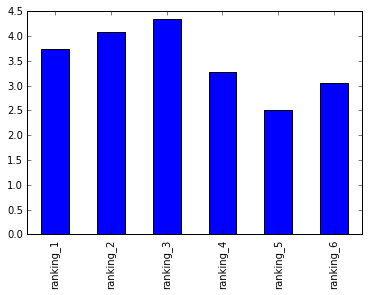

In [10]:
ranking.plot(kind="bar")

People liek 5th episode the most.

Let's see if rthis canges fpr people who declared themselves as fans of Star Wars series.

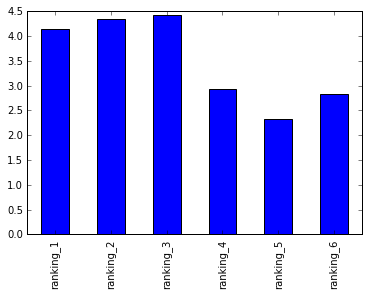

In [12]:
star_wars_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==True]

ranking_fans = star_wars_fans[star_wars_fans.columns[9:15]].mean()
ranking_fans.plot(kind="bar")

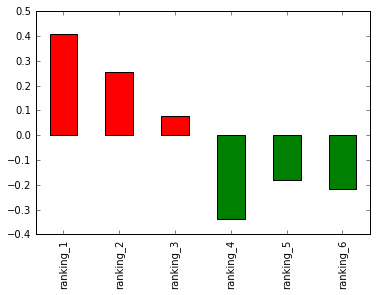

In [25]:
relative_rank  = ranking_fans-ranking
relative_rank.plot(kind="bar",color=relative_rank.map(lambda x: 'r'  if x>0 else 'g'))

Fans gave worse notes for new episodes (1-3) and better for the old ones (4-6)

## How many people saw each movie?

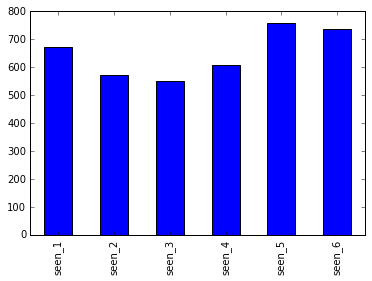

In [36]:
ranking_seen = star_wars[star_wars.columns[3:9]].sum()
ranking_seen.plot(kind="bar")


In [37]:
import numpy as np

np.corrcoef(np.array(ranking_seen),np.array(ranking))

(6,) (6,)


array([[ 1.        , -0.87812649],
       [-0.87812649,  1.        ]])

There is a strong negative correlation between "seen" and "ranking" for the movies. 
When we look at the data there are some people who have not seen the movie but gave a low score. Classic example of "I do not know the details so at least I will have an opinion" :)

## Is gender relevant for the star wars ranking scores?

In [46]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

ranking_males = males[males.columns[9:15]].mean()
ranking_females = females[females.columns[9:15]].mean()

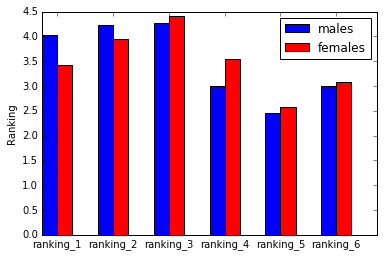

In [48]:

fig = plt.figure()
ax = fig.add_subplot(111)

ind = np.arange(len(ranking_males)) 
width = 0.27  

rects1 = ax.bar(ind, ranking_males, width, color='b')
rects2 = ax.bar(ind+width, ranking_females, width, color='r')

ax.set_ylabel('Ranking')
ax.set_xticks(ind+width)
ax.set_xticklabels(males.columns[9:15])
ax.legend( (rects1[0], rects2[0]), ('males', 'females') )


That is interesting! I thought that new episodes were more likable for women...